 # Imports

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in the files

In [158]:
gdp_df = pd.read_csv('C:/Users/theoc/Documents/NSS/Python/Projects/un_project-theo-carr/data/gdp_percapita.csv')

In [159]:
internet_df = pd.read_csv('C:/Users/theoc/Documents/NSS/Python/Projects/un_project-theo-carr/data/internet_use_new.csv')

# Look at the first six rows of both dataframes

In [160]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN


In [161]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


# Look at the shape of each dataframe

In [162]:
gdp_df.shape

(7176, 4)

In [163]:
internet_df.shape

(4495, 4)

### GDP: rows = 7176 col = 4, INTERNET: rows = 4677 col = 6

# Look at the datatypes of columns

In [164]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [165]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

# Look at the last 10 rows of each dataframe

In [166]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7166,Zimbabwe,1999,2872.714795,NaN
7167,Zimbabwe,1998,2915.052992,NaN
7168,Zimbabwe,1997,2856.118188,NaN
7169,Zimbabwe,1996,2808.558556,NaN
7170,Zimbabwe,1995,2573.993785,NaN
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


In [167]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


# Drop the 'value footnotes' column from each dataframe
### show that this worked properly

In [168]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [169]:
gdp_df.head(1)

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169


In [170]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [171]:
internet_df.head(1)

,Country or Area,Year,Value
0,Afghanistan,2014,6.39


# Change the column names for each dataframe

In [172]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [173]:
gdp_df.head(1)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169


In [174]:
internet_df.columns = ['Country', 'Year','Internet_Users_Pct']

In [175]:
internet_df.head(1)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39


# Merge the dataframes

In [176]:
gdp_and_internet_use = gdp_df.merge(internet_df,how='outer',on = ['Year','Country'])

### Testing

In [177]:
print(gdp_and_internet_use.shape)
print(internet_df.shape)
print(gdp_df.shape)

(8256, 4)
(4495, 3)
(7176, 3)


In [178]:
gdp_and_internet_use.loc[100:105]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
100,Albania,2001,6441.449833,0.325798
101,Albania,2000,5892.590548,0.114097
102,Albania,1999,5474.857679,0.081437
103,Albania,1998,4819.074667,0.065027
104,Albania,1997,4400.318994,0.048594
105,Albania,1996,4908.939354,0.032197


In [179]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [180]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
8251,Yemen,1999,NaN,0.056629
8252,Yemen,1998,NaN,0.023323
8253,Yemen,1997,NaN,0.015025
8254,Yemen,1996,NaN,0.000621
8255,Yemen,1990,NaN,0.000000


#### looks good for now

# Subset years = 2004,2009,2014

In [181]:
subset_years = [2004,2009,2014]
subset = gdp_and_internet_use.query('Year in @subset_years')
##test
subset.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
8219,Virgin Islands (U.S.),2009,NaN,27.396510
8224,Virgin Islands (U.S.),2004,NaN,27.377009
8236,Yemen,2014,NaN,22.550000
8241,Yemen,2009,NaN,9.960000
8246,Yemen,2004,NaN,0.881223


# Create three dataframes for each subset year

In [182]:
yr_2004 = subset.query('Year == 2004')
##test
yr_2004.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
16,Afghanistan,2004,1200.278013,0.105809
35,Africa Eastern and Southern,2004,3093.224738,NaN
66,Africa Western and Central,2004,3165.091102,NaN
97,Albania,2004,7580.138864,2.420388
128,Algeria,2004,10058.426230,4.634475


In [183]:
yr_2009 = subset.query('Year == 2009')
##test
yr_2009.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
11,Afghanistan,2009,1758.904477,3.55
30,Africa Eastern and Southern,2009,3461.681409,NaN
61,Africa Western and Central,2009,3652.114030,NaN
92,Albania,2009,10313.916340,41.20
123,Algeria,2009,10782.347380,11.23


In [184]:
yr_2014 = subset.query('Year == 2014')
##test
yr_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833880,60.10
118,Algeria,2014,11512.690470,18.09


# Which country had the highest % of internet users in 2014
## What was the percentage?

In [185]:
test = yr_2014.sort_values(by = 'Internet_Users_Pct', ascending = False)
test.head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2803,Iceland,2014,50450.74161,98.16


### ANSWER = Iceland, 98.16%

# Which country had the lowest % of internet users in 2014?

In [186]:
test = yr_2014.sort_values(by = 'Internet_Users_Pct')
test.head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7394,Dem. People's Rep. of Korea,2014,NaN,0.0


### ANSWER = Dem. People's Rep. of Korea with an astounding 0%

### Maybe there are multiple countries with 0% -- let's check

In [187]:
test.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7394,Dem. People's Rep. of Korea,2014,NaN,0.00
7452,Eritrea,2014,NaN,0.99
6536,Timor-Leste,2014,3266.731666,1.14
920,Burundi,2014,886.235296,1.38
5877,Somalia,2014,917.876549,1.63


#### Looks Good

# Repeat for 2004 and 2009

## 2004

In [188]:
high = yr_2004.sort_values(by = 'Internet_Users_Pct',ascending = False)
high.head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6298,Sweden,2004,44354.39106,83.89
2813,Iceland,2004,46051.74389,83.88
1571,Denmark,2004,50446.54160,80.93


In [189]:
low = yr_2004.sort_values(by = 'Internet_Users_Pct')
low.head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7403,Dem. People's Rep. of Korea,2004,NaN,0.000000
4563,Myanmar,2004,1473.020996,0.024337
3736,Liberia,2004,1219.414000,0.031011


## 2009

In [190]:
high = yr_2009.sort_values(by = 'Internet_Users_Pct',ascending = False)
high.head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2808,Iceland,2009,48770.95034,93.00
4885,Norway,2009,61689.55854,92.08
6293,Sweden,2009,45492.76817,91.00


In [191]:
low = yr_2009.sort_values(by = 'Internet_Users_Pct')
low.head(3)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7398,Dem. People's Rep. of Korea,2009,NaN,0.000000
6541,Timor-Leste,2009,2729.281474,0.185252
4558,Myanmar,2009,2527.390561,0.220000


# Which country had the highest GDP per cap in 2014?
#### What was that gdppc?

In [192]:
high = yr_2014.sort_values(by = 'GDP_Per_Capita', ascending = False)
high.head(1)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3919,"Macao SAR, China",2014,155201.7406,NaN


# Scatter plot time!

## Years: Percent Using Internet vs GDP Per Capita

<AxesSubplot:xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

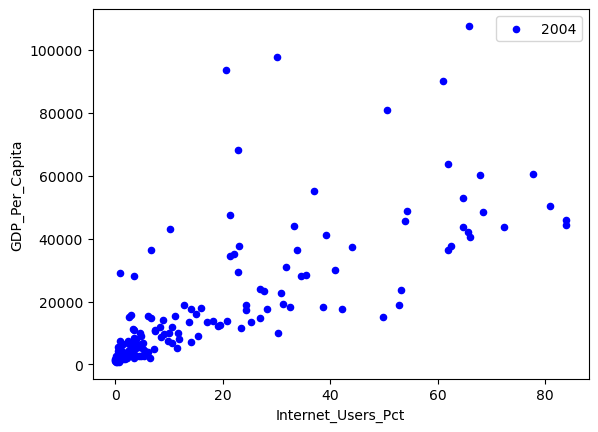

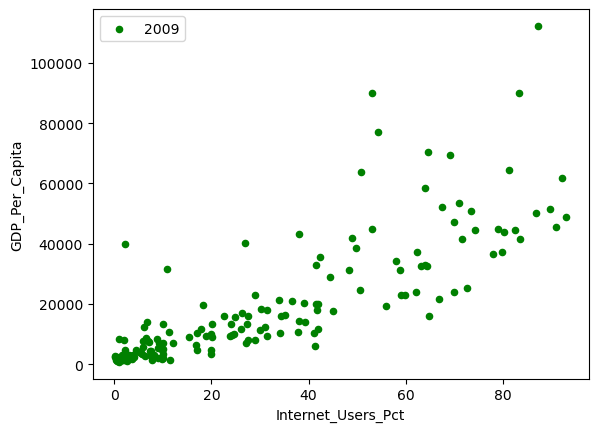

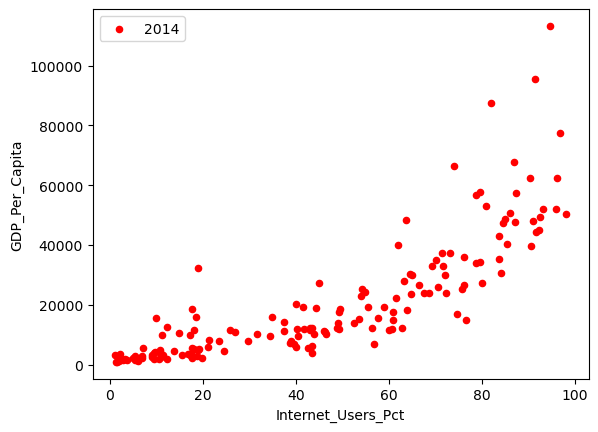

In [202]:
yr_2004.plot.scatter('Internet_Users_Pct','GDP_Per_Capita',label = '2004',color='blue')
yr_2009.plot.scatter('Internet_Users_Pct','GDP_Per_Capita',label = '2009',color ='green')
yr_2014.plot.scatter('Internet_Users_Pct','GDP_Per_Capita',label = '2014',color='red')

# Observations
### Over the years the right side of the graph becomes denser, indicating that internet usage saw growth over the time period
### but at the same time, the spread of gdps stayed relatively similar to the starting year 2004

# Is the gdp per capita 2014 distribution unimodal?

array([[<AxesSubplot:title={'center':'GDP_Per_Capita'}>]], dtype=object)

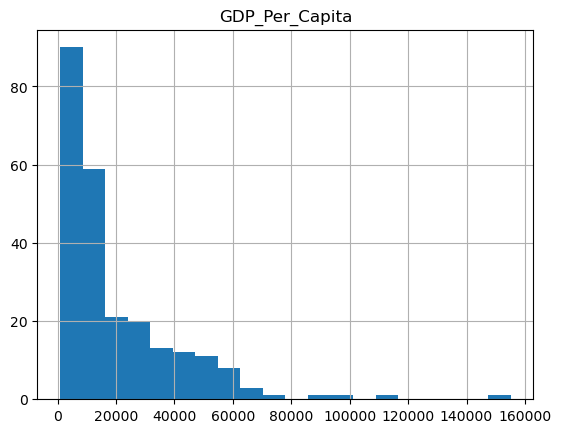

In [206]:
yr_2014.hist('GDP_Per_Capita',bins=20)

### The distribution is unimodal, with a huge peak in the lowest gdp per capita bin

# How about internet use? (2014)

array([[<AxesSubplot:title={'center':'Internet_Users_Pct'}>]],
      dtype=object)

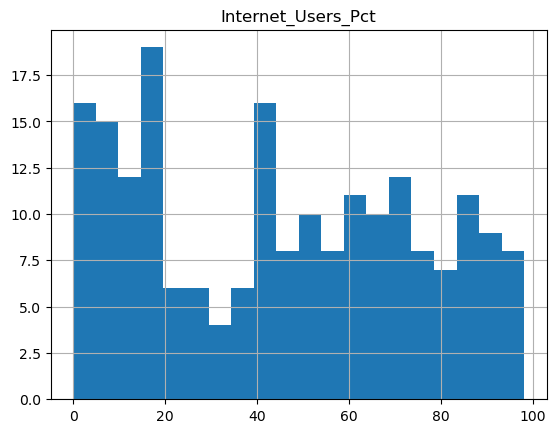

In [207]:
yr_2014.hist('Internet_Users_Pct',bins = 20)

### Internet Usage distribution does not appear to be unimodal, there are two primary peaks: just below 20% and just above 40%; And there are other bins with comparable levels

# What are the top 5 countries in terms of internet use in 2014?

In [221]:
top_5_2014 = yr_2014.sort_values(by = 'Internet_Users_Pct',ascending = False)
top_5_2014 = top_5_2014.head(5)
top_5_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2803,Iceland,2014,50450.74161,98.16
645,Bermuda,2014,77361.10488,96.80
4880,Norway,2014,62390.13031,96.30
1561,Denmark,2014,52048.33549,95.99
7179,Andorra,2014,NaN,95.90


# Create a DataFrame called top_5_internet
### from combined dataframe with all three years
### there should be 15 rows

In [230]:
## rename to better variable
three_year_anal = subset
## combine dataframes
top_5_internet = top_5_2014.merge(three_year_anal,how = 'inner',on = 'Country')
## test
top_5_internet.shape

(15, 7)

#### Let's Check out the new dataframe to make sure its all working

In [231]:
top_5_internet

,Country,Year_x,GDP_Per_Capita_x,Internet_Users_Pct_x,Year_y,GDP_Per_Capita_y,Internet_Users_Pct_y
0,Iceland,2014,50450.74161,98.16,2014,50450.74161,98.160000
1,Iceland,2014,50450.74161,98.16,2009,48770.95034,93.000000
2,Iceland,2014,50450.74161,98.16,2004,46051.74389,83.880000
3,Bermuda,2014,77361.10488,96.80,2014,77361.10488,96.800000
4,Bermuda,2014,77361.10488,96.80,2009,89961.98274,83.250000
5,Bermuda,2014,77361.10488,96.80,2004,90195.81156,60.990867
6,Norway,2014,62390.13031,96.30,2014,62390.13031,96.300000
7,Norway,2014,62390.13031,96.30,2009,61689.55854,92.080000
8,Norway,2014,62390.13031,96.30,2004,60699.56658,77.690000
9,Denmark,2014,52048.33549,95.99,2014,52048.33549,95.990000


### Now lets clean up the table

In [236]:
## delete extra axie
clean_top_5_internet = top_5_internet.drop(columns = ['Year_x','GDP_Per_Capita_x','Internet_Users_Pct_x'])
##rename leftover
temp = clean_top_5_internet.rename(columns={'Year_y': 'Year','GDP_Per_Capita_y' : 'GDP_Per_Capita','Internet_Users_Pct_y':'Internet_Users_Pct'})
#assign to variable
top_5_internet = temp
##test
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Iceland,2014,50450.74161,98.160000
1,Iceland,2009,48770.95034,93.000000
2,Iceland,2004,46051.74389,83.880000
3,Bermuda,2014,77361.10488,96.800000
4,Bermuda,2009,89961.98274,83.250000
5,Bermuda,2004,90195.81156,60.990867
6,Norway,2014,62390.13031,96.300000
7,Norway,2009,61689.55854,92.080000
8,Norway,2004,60699.56658,77.690000
9,Denmark,2014,52048.33549,95.990000


### Looks much better now, let's move on
#### be careful running this code again, as it may mess up the flow of the workbook

# Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries

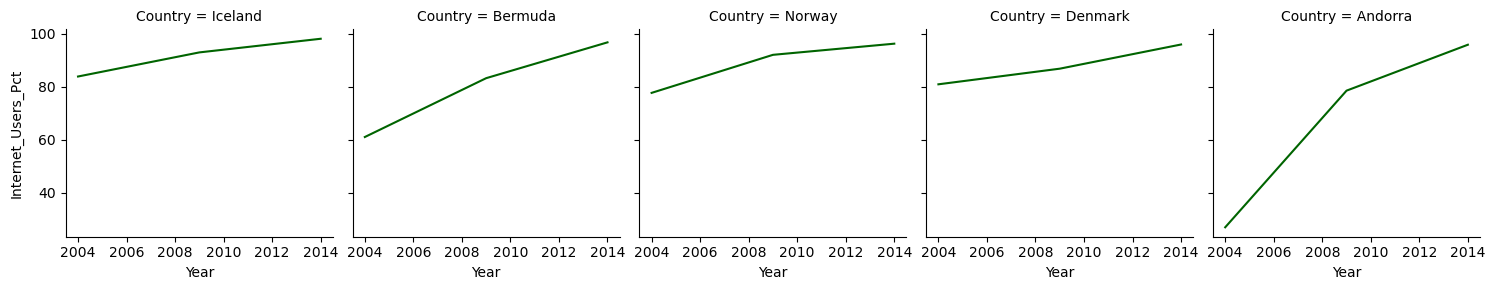

In [256]:
year_facet = sns.FacetGrid(top_5_internet,col = 'Country')
internet_map = year_facet.map(sns.lineplot,'Year','Internet_Users_Pct',color = 'darkgreen')

#### Andorra had the starkest increase in internet usage out of the top 5 

# Now look at the lowest 5 countries in terms of internet use

### First Step is to create our low_5 dataframe

In [259]:
low_internet_2014 = yr_2014.sort_values(by = 'Internet_Users_Pct')
low_internet_2014 = low_internet_2014.head(5)
low_internet_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7394,Dem. People's Rep. of Korea,2014,NaN,0.00
7452,Eritrea,2014,NaN,0.99
6536,Timor-Leste,2014,3266.731666,1.14
920,Burundi,2014,886.235296,1.38
5877,Somalia,2014,917.876549,1.63


### Now, let's merge with three year table

In [264]:
## join the tables
temp = low_internet_2014.merge(three_year_anal,how = 'inner',on = ['Country'])
## test
temp

,Country,Year_x,GDP_Per_Capita_x,Internet_Users_Pct_x,Year_y,GDP_Per_Capita_y,Internet_Users_Pct_y
0,Dem. People's Rep. of Korea,2014,NaN,0.00,2014,NaN,0.000000
1,Dem. People's Rep. of Korea,2014,NaN,0.00,2009,NaN,0.000000
2,Dem. People's Rep. of Korea,2014,NaN,0.00,2004,NaN,0.000000
3,Eritrea,2014,NaN,0.99,2014,NaN,0.990000
4,Eritrea,2014,NaN,0.99,2009,NaN,0.540000
5,Timor-Leste,2014,3266.731666,1.14,2014,3266.731666,1.140000
6,Timor-Leste,2014,3266.731666,1.14,2009,2729.281474,0.185252
7,Timor-Leste,2014,3266.731666,1.14,2004,2258.384170,NaN
8,Burundi,2014,886.235296,1.38,2014,886.235296,1.380000
9,Burundi,2014,886.235296,1.38,2009,831.564844,0.900000


#### Again, let's clean it

In [268]:
clean = temp.drop(columns = ['Year_x','GDP_Per_Capita_x','Internet_Users_Pct_x'])
clean = clean.rename(columns = {'Year_y':'Year','GDP_Per_Capita_y':'GDP_Per_Capita','Internet_Users_Pct_y':'Internet_Users_Pct'})
##assign to better var name
low_internet_5 = clean
low_internet_5

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Dem. People's Rep. of Korea,2014,NaN,0.000000
1,Dem. People's Rep. of Korea,2009,NaN,0.000000
2,Dem. People's Rep. of Korea,2004,NaN,0.000000
3,Eritrea,2014,NaN,0.990000
4,Eritrea,2009,NaN,0.540000
5,Timor-Leste,2014,3266.731666,1.140000
6,Timor-Leste,2009,2729.281474,0.185252
7,Timor-Leste,2004,2258.384170,NaN
8,Burundi,2014,886.235296,1.380000
9,Burundi,2009,831.564844,0.900000


## Seaborn Time!

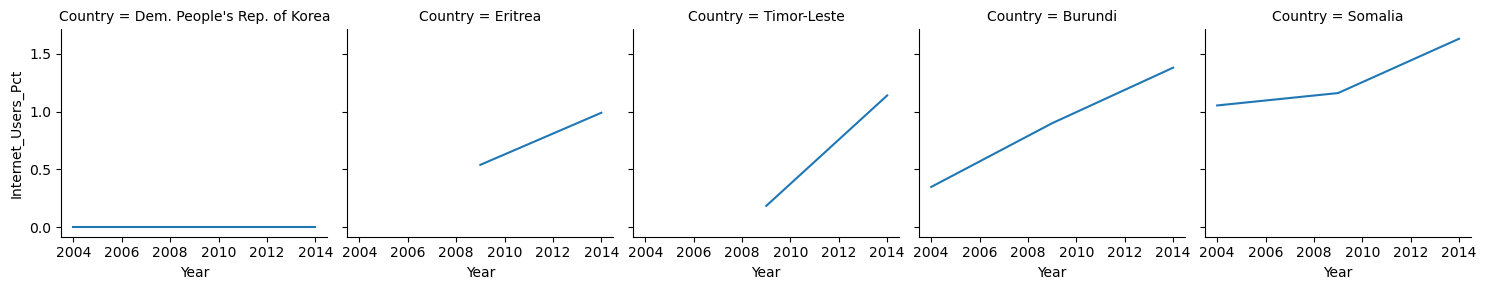

In [271]:
low_internet_facet = sns.FacetGrid(low_internet_5, col = 'Country')
low_internet_map = low_internet_facet.map(sns.lineplot,'Year','Internet_Users_Pct')

#### North Korea consistently is the worst in terms of percent internet usage... with 0 every year measured

# Investegate the same for highest GDP Per Capita(2014)

### Step One: Create Top 5 Table

In [273]:
top_5_gdp = yr_2014.sort_values(by = 'GDP_Per_Capita', ascending = False)
top_5_gdp = top_5_gdp.head(5)
top_5_gdp = top_5_gdp.reset_index(drop = True)
top_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,"Macao SAR, China",2014,155201.74060,NaN
1,Luxembourg,2014,113313.57890,94.67
2,Qatar,2014,95578.26151,91.49
3,Singapore,2014,87616.63753,82.00
4,Bermuda,2014,77361.10488,96.80


### Step Two: Join with three year table

In [275]:
## do the join
temp = top_5_gdp.merge(three_year_anal, how = 'inner', on = 'Country')
## test
temp

,Country,Year_x,GDP_Per_Capita_x,Internet_Users_Pct_x,Year_y,GDP_Per_Capita_y,Internet_Users_Pct_y
0,"Macao SAR, China",2014,155201.74060,NaN,2014,155201.74060,NaN
1,"Macao SAR, China",2014,155201.74060,NaN,2009,96493.79306,NaN
2,"Macao SAR, China",2014,155201.74060,NaN,2004,73322.92848,NaN
3,Luxembourg,2014,113313.57890,94.67,2014,113313.57890,94.670000
4,Luxembourg,2014,113313.57890,94.67,2009,112230.08140,87.310000
5,Luxembourg,2014,113313.57890,94.67,2004,107634.83720,65.880000
6,Qatar,2014,95578.26151,91.49,2014,95578.26151,91.490000
7,Qatar,2014,95578.26151,91.49,2009,89954.84611,53.100000
8,Qatar,2014,95578.26151,91.49,2004,93748.55013,20.701648
9,Singapore,2014,87616.63753,82.00,2014,87616.63753,82.000000


### Step Three: Clean er' up

In [276]:
clean = temp.drop(columns = ['Year_x','GDP_Per_Capita_x','Internet_Users_Pct_x'])
clean = clean.rename(columns = {'Year_y':'Year','GDP_Per_Capita_y':'GDP_Per_Capita','Internet_Users_Pct_y':'Internet_Users_Pct'})
##assign to better var name
top_5_gdp = clean
top_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,"Macao SAR, China",2014,155201.74060,NaN
1,"Macao SAR, China",2009,96493.79306,NaN
2,"Macao SAR, China",2004,73322.92848,NaN
3,Luxembourg,2014,113313.57890,94.670000
4,Luxembourg,2009,112230.08140,87.310000
5,Luxembourg,2004,107634.83720,65.880000
6,Qatar,2014,95578.26151,91.490000
7,Qatar,2009,89954.84611,53.100000
8,Qatar,2004,93748.55013,20.701648
9,Singapore,2014,87616.63753,82.000000


### Final Step: Bring in Seaborn!

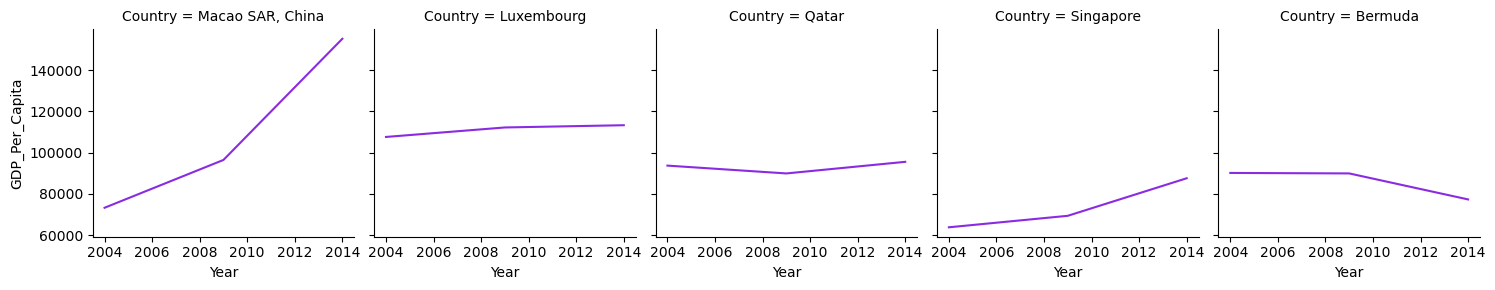

In [281]:
top_gdp_facet = sns.FacetGrid(top_5_gdp, col = 'Country')
top_gdp_map = top_gdp_facet.map(sns.lineplot,'Year','GDP_Per_Capita', color = 'blueviolet')

# Gonna Repeat One More Time... looking at lowest gdp

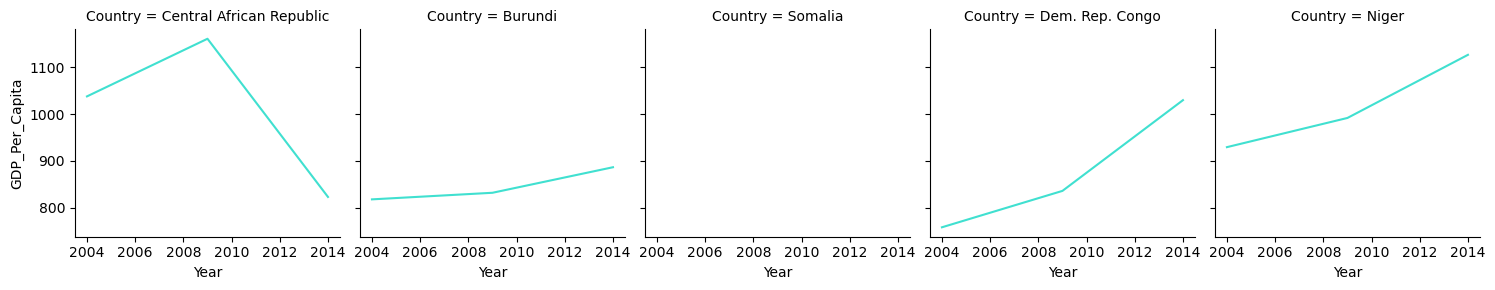

In [284]:
## Create Table
low_gdp_5 = yr_2014.sort_values(by = 'GDP_Per_Capita')
low_gdp_5 = low_gdp_5.head(5)
## Merge With Three year
temp = low_gdp_5.merge(three_year_anal, how = 'inner', on = 'Country')
## Clean
clean = temp.drop(columns = ['Year_x','GDP_Per_Capita_x','Internet_Users_Pct_x'])
clean = clean.rename(columns = {'Year_y':'Year','GDP_Per_Capita_y':'GDP_Per_Capita','Internet_Users_Pct_y':'Internet_Users_Pct'})
## assign to better var name
low_gdp_5 = clean
## Seaborn
low_gdp_facet = sns.FacetGrid(low_gdp_5, col = 'Country')
low_gdp_map = low_gdp_facet.map(sns.lineplot,'Year','GDP_Per_Capita',color = 'turquoise')

## Somalia has null values for 2004, 2009 so the line graph shows up as blank -- not sure what to do here

#### Based on internet reasearch, due to the volatile conditions of somalia, UN involvement in the country has been spotty as they have been forced to halt efforts in the countries multiple times due to dangerous conditions

# Why does The Central African Republic's GDP Per Capita Decline Heavily after increasing from 2004 to 2009?

#### Central African Republic (CAR) in the 21st century has been dominated by civil war - a large contributing factor to the country ranking worst in gdp per capita in the world today. The growth from 2004 to 2009 can potentially be attributed to a time of relative peace in the country, caused by a peace agreement reached in 2007 that greatly limited conflict in the country. However, by 2012 fighting resumed in full force as rebel groups rapidly took over territorry in the northern regions of the country, and by March 2013, the rebels had taken over the capital city. It is my best guess that this is the primary cause of the sharp decline the per capita gdp sees from 2009 to 2014.

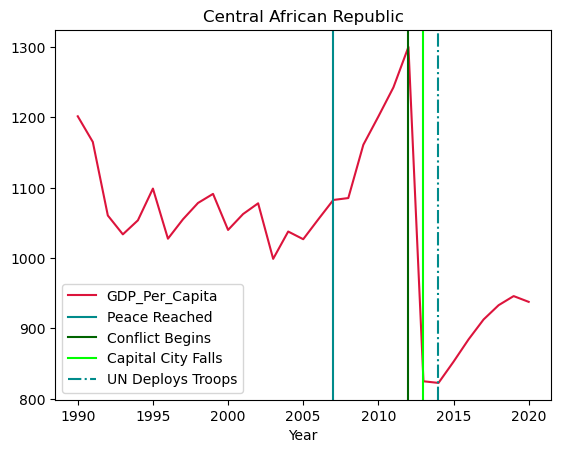

In [338]:
car_stats = gdp_and_internet_use.query('Country == "Central African Republic"')
car_stats = car_stats.sort_values(by = 'Year')
car_stats.plot.line('Year','GDP_Per_Capita',color = 'crimson',title = 'Central African Republic')
plt.axvline(x = 2007,label = 'Peace Reached',color = 'darkcyan')
plt.axvline(x = 2012,label = 'Conflict Begins',color = 'darkgreen',linestyle = 'solid')
plt.axvline(x = 2013,label = 'Capital City Falls',color = 'lime',linestyle = 'solid')
plt.axvline(x = 2014,label = 'UN Deploys Troops',linestyle = 'dashdot',color = 'darkcyan')
plt.legend()

### This line chart investigates the GDP Per Capita overlayed with some key timeline points from the civil conflict